In [8]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [18]:
def busqueda_secuencial_(lista, x):
    '''Si x está en la lista devuelve el índice de su primer aparición, 
    de lo contrario devuelve -1.
    '''
    comps = 0 # inicializo en cero la cantidad de comparaciones
    pos = -1
    for i,z in enumerate(lista):
        comps += 1 # sumo la comparación que estoy por hacer
        if z == x:
            pos = i
            break
    return pos, comps

def busqueda_binaria(lista, x):
    '''Búsqueda binaria
    Precondición: la lista está ordenada
    Devuelve -1 si x no está en lista;
    Devuelve p tal que lista[p] == x, si x está en lista
    '''
    comps = 0
    pos = -1 
    izq = 0
    der = len(lista) - 1
    while izq <= der:
        comps += 1
        medio = (izq + der) // 2
        if lista[medio] == x:
            pos = medio     
        if lista[medio] > x:
            der = medio - 1 
        else:               
            izq = medio + 1 
    return pos, comps

def generar_lista(n, m):
    l = random.sample(range(m), k = n)
    l.sort()
    return l

def generar_elemento(m):
    return random.randint(0, m-1)

m = 10000
n = 100
k = 1000
lista = generar_lista(n, m)

def experimento_secuencial_promedio(lista, m, k):
    comps_tot = 0
    for i in range(k):
        x = generar_elemento(m)
        comps_tot += busqueda_secuencial_(lista,x)[1]
    
    comps_prom = comps_tot / k
    return comps_prom

def experimento_binario_promedio(lista, m, k):
    comps_tot = 0
    for i in range(k):
        x = generar_elemento(m)
        comps_tot += busqueda_binaria(lista,x)[1]

    comps_prom = comps_tot / k
    return comps_prom

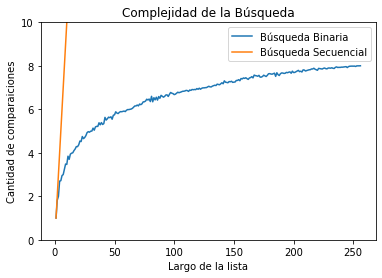

In [23]:
largos = np.arange(256) + 1 # largos de listas a usar
comps_promedio_bin = np.zeros(256) # promedio de comparaciones sobre una lista de largo i, para i entre 1 y 256.
comps_promedio_sec = np.zeros(256)

for i, n in enumerate(largos):
    lista = generar_lista(n, m) # lista de largo n
    comps_promedio_bin[i] = experimento_binario_promedio(lista, m, k)
    comps_promedio_sec[i] = experimento_secuencial_promedio(lista, m, k)
    


# Gráfico de ambas comparaciones.
plt.plot(largos, comps_promedio_bin, label='Búsqueda Binaria')
plt.plot(largos, comps_promedio_sec, label='Búsqueda Secuencial')
plt.xlabel("Largo de la lista")
plt.ylabel("Cantidad de comparaiciones")
plt.title("Complejidad de la Búsqueda")
plt.ylim([0, 10])
plt.legend()
plt.show()

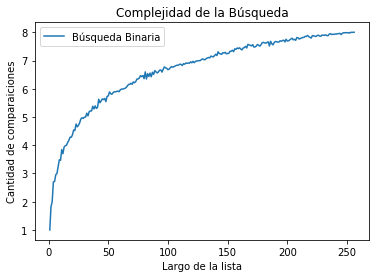

In [24]:
# Gráfico de comparaciones de búsqueda binaria

plt.plot(largos, comps_promedio_bin, label='Búsqueda Binaria')
plt.xlabel("Largo de la lista")
plt.ylabel("Cantidad de comparaiciones")
plt.title("Complejidad de la Búsqueda")
plt.legend()